<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/IGTI_Bootcamp_Machine_Learning_Analyst_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="60%" src="https://cdn3.datascience.berkeley.edu/content/ce8da8979df641eebae4b0837f6a54fd/4430_whatismachinelearning_hero.jpg">

*Picture from https://datascience.berkeley.edu/blog/what-is-machine-learning/*

#### **BOOTCAMP MACHINE LEARNING ANALYST | IGTI**
*by [Ellen Paes](https://www.linkedin.com/in/ellenpaes)*

---


**Challenge Module 1:** For this project, the challenge is to analyze a modified dataset about Bike Sharing available on the UCI Machine Learning Repository and answer some questions.

Original dataset: (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)


In [83]:
# import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/ellenrpaes/Datasets_and_Images/master/comp_bikes_mod.csv")

In [85]:
# Checking the 5 firsts rows
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [86]:
# Checking data size. How many instances and attributes are there, respectively?
print("instances:\t{}".format(df.shape[0]))
print("attributes:\t{}".format(df.shape[1]))

instances:	17379
attributes:	17


In [87]:
# How many different types of data are there?
df.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [88]:
# What is the proportion (in%) of null values ​​in the "temp" column (normalized room temperature)?
(df.isnull().sum() / df.shape[0])

instant       0.100006
dteday        0.100006
season        0.100006
yr            0.100006
mnth          0.100006
hr            0.100006
holiday       0.100006
weekday       0.100006
workingday    0.100006
weathersit    0.100006
temp          0.100006
atemp         0.100006
hum           0.100006
windspeed     0.100006
casual        0.100006
registered    0.100006
cnt           0.100006
dtype: float64

In [89]:
# After removing the rows that contain null values ​​for the "dteday" column, how many instances and attributes, respectively, do we have?
df_new = df.dropna(subset=['dteday'])
print("instances:\t{}".format(df_new.shape[0]))
print("attributes:\t{}".format(df_new.shape[1]))

instances:	15641
attributes:	17


In [90]:
# Considering the dataset after removing the rows that contained null values ​​for the "dteday" column, what is the average value for the data in the "temp" column (normalized room temperature)?
df_new['temp'].mean()

0.4969259206597582

In [94]:
# Considering the dataset after removing the rows that contained null values ​​for the "dteday" column, what is the standard deviation for the "windspeed" column data (normalized wind speed)?
df_new.describe() ## or print(df_new['windspeed'].std())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [97]:
# Considering the dataset after removing the rows that contained null values ​​for the "dteday" column, turn the "season" column into categorical values. How many different categories are there?
df_new['season'].value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

In [98]:
# Considering the dataset after removing the rows that contained null values ​​for the "dteday" column, make the column "dteday" as "datetime" type. What is the last date in the dataset (YYYY-MM-DD)?
df_new['dteday'] = pd.to_datetime(df_new['dteday'], format='%Y-%m-%d')
df_new['dteday'].tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


17373   2012-12-31
17374   2012-12-31
17375   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, dtype: datetime64[ns]

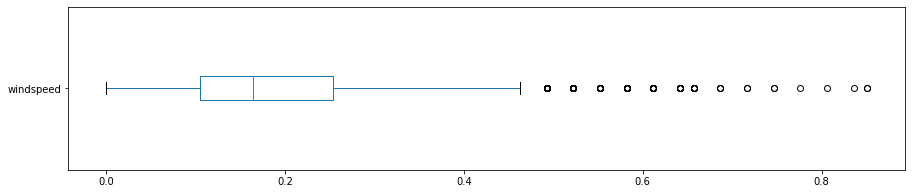

In [99]:
# Considering the dataset after removing the rows that contained null values ​​for the "dteday" column, create a boxplot related to "windspeed" column?
df_new.windspeed.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

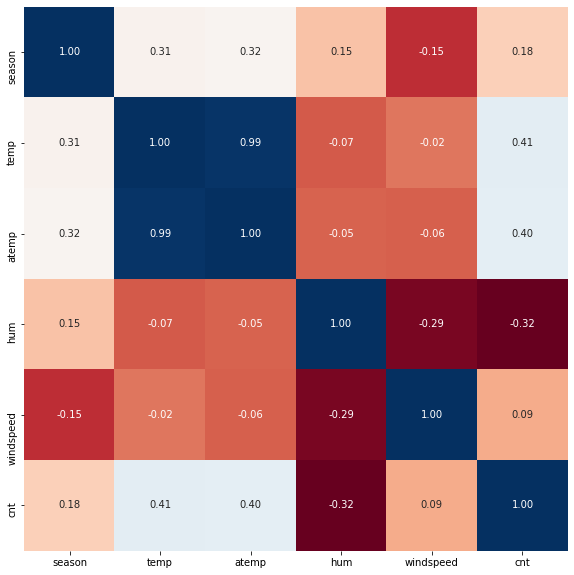

In [100]:
# Considering the dataset after removing the rows that contained null values ​​for the "dteday" column, select the columns "season", "temp", "atemp", "hum", "windspeed" and plot a correlation matrix.
# Correlation between variables
corr = df_new[["season", "temp", "atemp", "hum", "windspeed","cnt"]].corr()

# Create a graph
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax, square=True, linecolor='white', cmap='RdBu', cbar=False);

In [101]:
# Fill in the null values ​​for the "hum", "cnt" and "casual" columns with the average values. Use the "hum" and "casual" variables as independent and "cnt" as dependent and apply linear regression. What is the R2 value?
linear_regression = df_new[['hum', 'cnt', 'casual']].copy()
linear_regression = linear_regression.fillna(linear_regression.mean())

In [102]:
# 1. Import the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# 2. Choose the hyperparameters
model = LinearRegression()

# 3. Split the data between feature matrix e target vector
X = linear_regression[['hum','casual']]
y = linear_regression[['cnt']]

# 4. Fit the model (train)
model.fit(X, y)

# 5. Create a prediction based on new data
y_pred = model.predict(X)

# Check the model performance with R2 score
print("R2 Score:\t", r2_score(y, y_pred))

R2 Score:	 0.4059859251122173


In [103]:
# Now, apply Decision Tree Regressor. What is the approximate R2 value?

# 1. Import the model
from sklearn.tree import DecisionTreeRegressor

# 2. Choose the hyperparameters
model_tree_reg = DecisionTreeRegressor()

# 4. Fit the model (train)
model_tree_reg.fit(X, y)

# 5. Create a prediction based on new data
y_pred = model_tree_reg.predict(X)

# Check the model performance with R2 score
print("R2 Score:\t", r2_score(y, y_pred))

R2 Score:	 0.7098339715834964
